In [111]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
combined_mouse_clinical_data = pd.concat([mouse_drug_data, clinical_trial_data])

# Display the data table for preview
combined_mouse_clinical_data


,Drug,Metastatic Sites,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Stelasyn,NaN,f234,NaN,NaN
1,Stelasyn,NaN,x402,NaN,NaN
2,Stelasyn,NaN,a492,NaN,NaN
3,Stelasyn,NaN,w540,NaN,NaN
4,Stelasyn,NaN,v764,NaN,NaN
5,Stelasyn,NaN,o848,NaN,NaN
6,Stelasyn,NaN,z314,NaN,NaN
7,Stelasyn,NaN,g989,NaN,NaN
8,Stelasyn,NaN,m269,NaN,NaN
9,Stelasyn,NaN,a963,NaN,NaN


## Tumor Response to Treatment

In [112]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_mouse_clinical_data = combined_mouse_clinical_data.groupby(["Drug", "Timepoint"])
mean_tumor_data = grouped_mouse_clinical_data["Tumor Volume (mm3)"].mean()
mean_tumor_data

# Convert to DataFrame
mean_tumor_data_df = pd.DataFrame(mean_tumor_data).reset_index()

# Preview DataFrame
mean_tumor_data_df

,Drug,Timepoint,Tumor Volume (mm3)


In [113]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_data = grouped_mouse_clinical_data["Tumor Volume (mm3)"].sem()
standard_error_data

# Convert to DataFrame
standard_error_data_df = pd.DataFrame(standard_error_data).reset_index()

# Preview DataFrame
standard_error_data_df


,Drug,Timepoint,Tumor Volume (mm3)


In [114]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_table_sem = standard_error_data_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
reformatted_table_mean = mean_tumor_data_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
# Preview that Reformatting worked
reformatted_table_mean

Drug
Timepoint


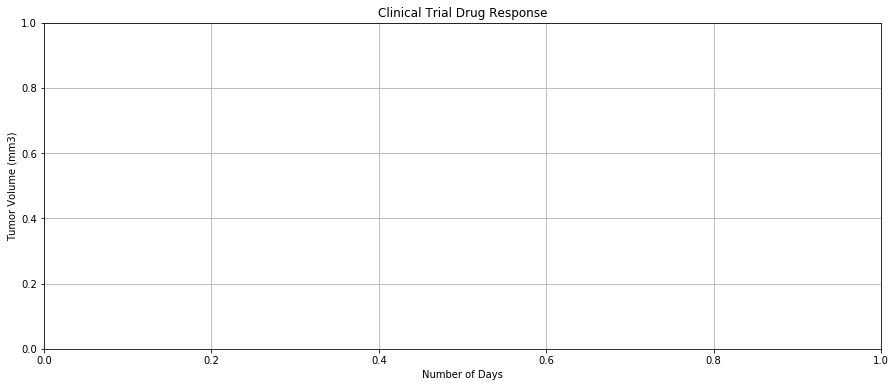

In [115]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(15,6))
plt.title("Clinical Trial Drug Response")
plt.xlabel("Number of Days")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.rcParams["font.size"] = 10

drug_list = reformatted_table_mean.columns

for drug in drug_list:
    plot_drug = plt.errorbar(reformatted_table_mean.index, reformatted_table_mean[drug], reformatted_table_sem[drug], fmt='^', linestyle='--', label=drug)
    plt.legend(loc='best')
    if drug == drug_index[-1]:
        plt.savefig("Tumor_Volume.png")
# Show Figure 
plt.show()

## Metastatic Response to Treatment

In [116]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_site = combined_mouse_clinical_data.groupby(["Drug","Timepoint"])
mean_met_site = grouped_met_site["Metastatic Sites"].mean()
mean_met_site

# Convert to DataFrame
mean_met_site_df = pd.DataFrame(mean_met_site).reset_index()

# Preview DataFrame
mean_met_site_df

,Drug,Timepoint,Metastatic Sites


In [117]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grouped_met_site = combined_mouse_clinical_data.groupby(["Drug", "Timepoint"])
standard_error_met_site = grouped_met_site["Metastatic Sites"].sem()
standard_error_met_site

# Convert to DataFrame
standard_error_met_site_df = pd.DataFrame(standard_error_met_site).reset_index()

# Preview DataFrame
standard_error_met_site_df

,Drug,Timepoint,Metastatic Sites


In [118]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_met_sem = standard_error_met_site_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
reformatted_met_mean = mean_met_site_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked
reformatted_met_mean


Drug
Timepoint


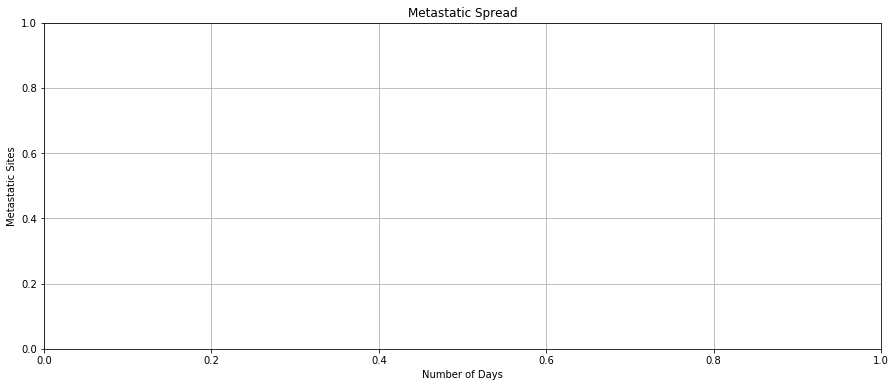

In [119]:
# Generate the Plot (with Error Bars)

plt.figure(figsize=(15,6))
plt.title("Metastatic Spread")
plt.xlabel("Number of Days")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.rcParams["font.size"] = 10

drug_list = reformatted_met_mean.columns

for drug in drug_list:
    plot_drug = plt.errorbar(reformatted_met_mean.index, reformatted_met_mean[drug], reformatted_met_sem[drug], fmt='^', linestyle='--', label=drug)
    plt.legend(loc='best')
    if drug == drug_index[-1]:
        plt.savefig("Metastatic_Sites.png")
# Show Figure 
plt.show()

## Survival Rates

In [120]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_mouse_id = combined_mouse_clinical_data.groupby(["Drug", "Timepoint"])
mouse_id_count = grouped_mouse_id["Mouse ID"].count()
mouse_id_sem = grouped_mouse_id["Mouse ID"].sem()
mouse_id_sem

# Convert to DataFrame
mouse_id_df = pd.DataFrame(mouse_id_count).reset_index()
mouse_id_sem_df = pd.DataFrame(mouse_id_sem).reset_index()

# Preview DataFrame
mouse_id_sem_df

,index,Mouse ID


In [129]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_mouse_count = mouse_id_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')

# Preview the Data Frame
reformatted_mouse_count

Drug
Timepoint


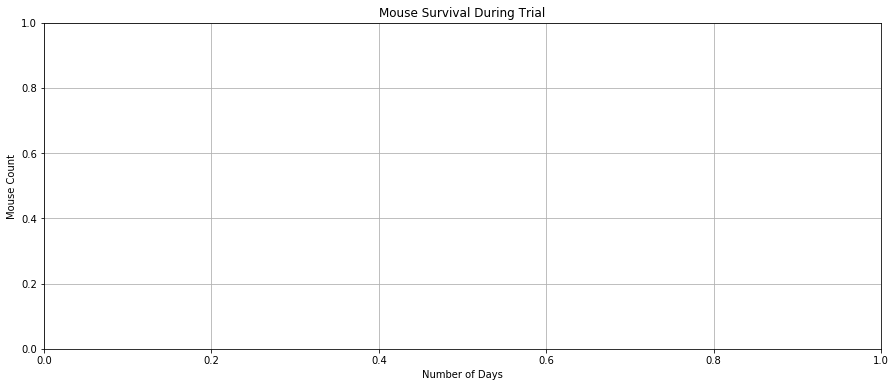

In [135]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(15,6))
plt.title("Mouse Survival During Trial")
plt.xlabel("Number of Days")
plt.ylabel("Mouse Count")
plt.grid()
plt.rcParams["font.size"] = 10 

for drug in drug_list:
    plot_drug = plt.errorbar(reformatted_mouse_count.index, reformatted_mouse_count[drug], mouse_id_sem[drug], fmt='^', linestyle='--', label=drug)
    plt.legend(loc='best')
    if drug == drug_index[-1]:
        plt.savefig("Mouse_ID.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [138]:
# Calculate the percent changes for each drug
percent_change = (mean_tumor_data_df.iloc[3,:] - mean_tumor_data_df.iloc[0,:])/mean_tumor_data_df.iloc[0,:] * 100
percent_change
# Display the data to confirm


IndexError: single positional indexer is out-of-bounds

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

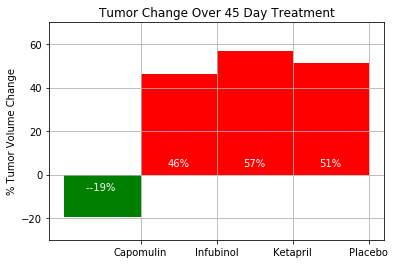